# Импорты

In [126]:
# import requests as req

# Для работы с таблицами
import pandas as pd
import numpy as np

# Для работы со смайликами в тексте
import emoji

# Для превращения смайликов в слова
import demoji

# pip install googletrans==3.1.0a0
# Переводчик
import googletrans
from googletrans import Translator

In [127]:
import nltk
from nltk.corpus import stopwords
import pymorphy3
from tqdm.auto import tqdm
import re
import matplotlib.pyplot as plt
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\melni\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Telegram (проверка данных, полученных с помощью парсера)

In [128]:
df_telegram = pd.read_csv('chats1.csv')

In [129]:
df_telegram2 = pd.read_csv('chats2.csv')

In [130]:
df_telegram.head(10)

message
0  В декабре на ВКМСК приступает к работе новое с...
1  ❓Вы знали, где находится первая и единственная...
2                                                NaN
3                                                NaN
4                                                NaN
5                                                NaN
6                                                NaN
7  Сегодня страна отмечает День матери — день бла...
8                                                NaN
9                                                NaN

In [131]:
df_telegram2.head(10)

message
0                                                NaN
1  Буксир-толкач «Дунайский-65» на зимовке в Каза...
2                                                NaN
3                                                NaN
4                                                NaN
5  —Томас, где ваша ферма?\nСудя по открытой инфо...
6                                                NaN
7  🆘 Экипаж нефтяного танкера 🚢 Mersin (IMO: 9428...
8  Надстройка танкера KAIROS потушена.\n\nВскоре,...
9                                                NaN

In [132]:
df_telegram = pd.concat([df_telegram, df_telegram2])

# EDA

In [133]:
df_telegram

message
0     В декабре на ВКМСК приступает к работе новое с...
1     ❓Вы знали, где находится первая и единственная...
2                                                   NaN
3                                                   NaN
4                                                   NaN
...                                                 ...
9995                                                NaN
9996                                                NaN
9997  Красноармейский рейд ранним утром 26 октября 2...
9998                            🧳 Закат над Химкинским.
9999  Буксир-толкач «ОТА-929» с приставкой «СФС-333»...

[13000 rows x 1 columns]

In [134]:
df_telegram = df_telegram.drop_duplicates()

In [135]:
df_telegram

message
0     В декабре на ВКМСК приступает к работе новое с...
1     ❓Вы знали, где находится первая и единственная...
2                                                   NaN
7     Сегодня страна отмечает День матери — день бла...
13    🇷🇺Сегодня в рамках совместного с Музеем морско...
...                                                 ...
9991  Буксир «Рита» (тип Полярник) выходил из реки Д...
9994  Буксир-толкач «Шлюзовой-240» с баржей «ВД-1256...
9997  Красноармейский рейд ранним утром 26 октября 2...
9998                            🧳 Закат над Химкинским.
9999  Буксир-толкач «ОТА-929» с приставкой «СФС-333»...

[4508 rows x 1 columns]

In [136]:
df_telegram.iloc[1].message

'❓Вы знали, где находится первая и единственная приливная электростанция России? В нашей рубрике #ауреки рассказываем.\n\nКислогубская ПЭС расположена в губе Кислая Баренцева моря, вблизи посёлка Ура-Губа Мурманской области. \n• Сооружена в 1964–1968 годах по проекту института «Гидропроект». \n• Введена в эксплуатацию 28 декабря 1968 года. \n• В 1994 году в связи со сложной экономической ситуацией ПЭС была законсервирована. \n• В 2004–2006 годах станция была восстановлена, возобновила работу в 2007 году как экспериментальная база для отработки новых гидроагрегатов и технологий сооружения приливных электростанций. \n\nСтанция изначально задумывалась как экспериментальная площадка для отработки целого ряда перспективных технологий, таких как наплавной способ возведения здания станции, обеспечение постоянной работы сооружений и оборудования в суровых климатических условиях и при воздействии морской воды.\nСтроительство ПЭС было произведено передовым для того времени наплавным способом — ж

In [137]:
len(df_telegram)

4508

In [138]:
df_telegram = df_telegram.dropna()

In [139]:
set_text = []
for name in df_telegram['message']:
    set_text.append(name)

In [140]:
set_text

['В декабре на ВКМСК приступает к работе новое судно обеспечения \n\nСудно «Берилл» усилит флот «Росморпорта», сейчас оно  находится в морском порту Астрахани.\n\n«Берилл» – головное судно проекта FPW1, предназначенное для комплексного сопровождения несамоходных земснарядов высокой производительности проекта FPDG3. \n\nВ задачи судна входит буксировка, снабжение топливом и водой, а также вспомогательные работы при дноуглублении. \n\nЛедовый класс Ice1 позволяет эксплуатировать «Берилл» круглогодично, включая зимний период.\n\n🖥Росморречфлот в MAX | ВК',
 '❓Вы знали, где находится первая и единственная приливная электростанция России? В нашей рубрике #ауреки рассказываем.\n\nКислогубская ПЭС расположена в губе Кислая Баренцева моря, вблизи посёлка Ура-Губа Мурманской области. \n• Сооружена в 1964–1968 годах по проекту института «Гидропроект». \n• Введена в эксплуатацию 28 декабря 1968 года. \n• В 1994 году в связи со сложной экономической ситуацией ПЭС была законсервирована. \n• В 2004–

In [141]:
len(set_text)

4507

In [142]:
set_text = [line.strip() for line in set_text]

In [143]:
set_text

['В декабре на ВКМСК приступает к работе новое судно обеспечения \n\nСудно «Берилл» усилит флот «Росморпорта», сейчас оно  находится в морском порту Астрахани.\n\n«Берилл» – головное судно проекта FPW1, предназначенное для комплексного сопровождения несамоходных земснарядов высокой производительности проекта FPDG3. \n\nВ задачи судна входит буксировка, снабжение топливом и водой, а также вспомогательные работы при дноуглублении. \n\nЛедовый класс Ice1 позволяет эксплуатировать «Берилл» круглогодично, включая зимний период.\n\n🖥Росморречфлот в MAX | ВК',
 '❓Вы знали, где находится первая и единственная приливная электростанция России? В нашей рубрике #ауреки рассказываем.\n\nКислогубская ПЭС расположена в губе Кислая Баренцева моря, вблизи посёлка Ура-Губа Мурманской области. \n• Сооружена в 1964–1968 годах по проекту института «Гидропроект». \n• Введена в эксплуатацию 28 декабря 1968 года. \n• В 1994 году в связи со сложной экономической ситуацией ПЭС была законсервирована. \n• В 2004–

In [144]:
df_telegram = pd.DataFrame(set_text, columns = ['text'])
df_telegram['goal'] = 'РосМорРечФлот'
df_telegram[:2]

text           goal
0  В декабре на ВКМСК приступает к работе новое с...  РосМорРечФлот
1  ❓Вы знали, где находится первая и единственная...  РосМорРечФлот

## Извелчение смайликов из текстов сообщений

In [145]:
def extract_emojis(s):
    return ''.join(c for c in s if c in emoji.EMOJI_DATA)

In [146]:
emoji_chat = [extract_emojis(s) for s in set_text]

In [147]:
emoji_chat

['🖥',
 '❓🖥',
 '⬆🦅',
 '',
 '',
 '🖥',
 '🔵🔵🔵🔵🔵🔵🖥',
 '⚡🖥',
 '🥇🥈🖥',
 '🖥',
 '📍🖥',
 '🖥',
 '🖥',
 '❓🖥',
 '🖥',
 '🖥',
 '',
 '👋🦅',
 '🖥',
 '🖥',
 '🖥',
 '🚚🔺🗺🚘🚢👷🏻♀🎓',
 '🖥',
 '🖥',
 '🦅',
 '🖥',
 '🖥',
 '⚡🖥',
 '⚡🖥',
 '🖥',
 '🔗',
 '',
 '',
 '🖥',
 '🖥',
 '🖥',
 '',
 '',
 '🖥',
 '🖥',
 '🖥',
 '🤼🤼♀🤼♂🤼',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '❓',
 '🔵🔵🔵',
 '',
 '',
 '',
 '',
 '⚡',
 '⬇▶▶▶▶🦅',
 '⚡',
 '',
 '🔵🔵🔵🔵🔵',
 '',
 '',
 '',
 '',
 '',
 '📶',
 '',
 '🛰',
 '',
 '⚡',
 '⭕⭕⭕⭕⭕⭕⭕🦅',
 '',
 '🔵🔵🔵👆',
 '⚡',
 '🗺',
 '🛳',
 '🔵🔵🔵🔵🔵🔵🔵',
 '',
 '',
 '',
 '',
 '⚡',
 '',
 '↗',
 '⚡',
 '',
 '',
 '📱',
 '🔵🔵',
 '❗',
 '',
 '',
 '',
 '📍📍',
 '✅✅✅',
 '',
 '',
 '',
 '',
 '🔵🔵',
 '🔵🔵🔵',
 '🏗✅🛳',
 '❓',
 '',
 '',
 '⚡',
 '🛳⬆🦅',
 '⚡',
 '⚡',
 '',
 '🔵🔵🔵🔵🔵🔵⭐👆',
 '⏪⏩⬆🦅',
 '🌊',
 '❓🔵🔵🔵',
 '📆',
 '🔵🔵🔵🔵',
 '',
 '',
 '',
 '',
 '👇',
 '',
 '🔵🔵🔵🔵',
 '⏪⏩🦅',
 '',
 '',
 '',
 '📱',
 '',
 '⚡',
 '🔍🔵🔵🔵🔵🔵🔵🔵',
 '🦅',
 '📄📄',
 '🛳',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '⚡',
 '⚡',
 '',
 '👍',
 '⚡',
 '',
 '↖↖🟦🟦🟦🟦',
 '',
 '',
 '🔵🔵🔵🔵',
 '⚡',
 '🗺',
 '🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵👆',
 '⚡🔵🔵🔵',
 '

In [148]:
emoji_chat_set = set(''.join(emoji_chat))
emoji_chat_set = ''.join(emoji_chat_set)
emoji_chat_set

'🧫🤗🕕☠🎙✅🐶🧹⚫🔻🌺👷⏹🕋✏🌦⏭🎁😈📰👉📛🤷😳🔴👏🖼⛈🔎🔵🙍🗾🎬😡🏴🔡▪🤖🚒🌊🌉🟩☝🔠🐤⚕📄🥂🪧⬆🔊👥🔘🖊😗💻🦊⚙🐱🎖🎼☔🧨🛣✳✊🐬❄🙌🔹🏛🎆🪢💰🙁🗒🌁🌈⛷🌤🥇💯📝↪🛶📣♂📸🔭🚠🥳😮🦀💳🛒🔔🛟❌☹❗🚢🐻📱🏳⚔🏟🕌🌃🗯🏫🙏☁🏚🤙📍⛽📷🆗🍽✈⛏🎉🚰⌛🏊🌅🆕✖🪜🏭🗓😆♦🕹🌙✍🏋☀🏞😱⛲🙂🎶‼🏠😚🍀🪨\U0001fa77🔣🚞🌝🦫🏿🤯🅾❤🚴🌧😋📕🪚🚀🏷🏖🚊✨🗿✉🔌🎞📌🌄📺👿🟥🎺☂🤫👻🪁📡👀🤿📋🦈💠▶💪🔧🚲🛩🍾📐🏆😝😄👨◾🌒🪱🏻🤬📆↕🍌🍁🕒💥🤍🐳❎❕🦺🚁🥈⚡🐠⏺🌱😇🛫🍿🏄🚘🕛🧑🙋🧡💡🙈♾⭕ℹ🌟🫀🦑💚⚠⚛🙄♥🟦😞🔱🗣🪔➿🌖⛰📻📈🫤🍄🚜🔟🍂⚒🥊🌍⚓🔒💸🪵🎈➡🕰🥉⛴🙎🏨😰🟨☃🔼😏🍭👌👇🛤👩🌬⚽🛰💨🌐📔🔑®😉🎨📞🧐📲🫅⛓💔🚗🥰🧧📽🎂🛹⛪🛳🧍☦🙃🤘🥱💎🚙⬅🚍😘🌇😕🌀🧭➗🏰💐💧🚂💿👍🌳☑↗🦬🛠🏁🔍👽🎓😍🕴👋🐗📅🔗✔🚫🗼⏰😣⛵🔆😴🏅🥹👄⌨🚛📴🌏🚨🎥☺\U0001fa75🔸⬛🛡🍎❓📹🦌🚮🔥🖤🟣➖🌷🤓🧳🌩🥴🎛♀🎗🎡🤴👈🫠🎵📬🌫😂🏔🏝🎣🍏👅📎📨🌴⚜😢♻😁👆🕵🟢⛄🍒🕐💄⬇🔢⛹🧯💃😔〽📜🧰🔬⏱⚖☎🌆🤔🚆🎩🧵🕗🚤🤨🫣🌽🌨🅿🤩🔄🥶™🖥🍐🧊🖌📁🆘🏙🔤⤵🤟🌎👮🕑〰✌🗃🥸📊😌©🌡⚪📦🚬🔺😊💫🐊😎⏮💬🔞🐟🔰🔖▫😫💲🛥🚩📩💵📢🕔🤪🌞🆎🦅🟠🪝🤎🏗⏩🤼🚚🚇🧱🚧🌾\U0001fa76↖💙💭🌌🟡🫡👾🌸😃🏢🔝🛢😙⛔🌘🎄👤🤣😀📚🎅🎊⭐😛📃☸💺📒🥲😒😥🌿🦭🤝🫧🚌🗺🍊🚑😜📶📑🅰⏪🌹🪖'

In [149]:
# demoji.download_codes()

In [150]:
# Декодирования смайликов
dict_emoj = demoji.findall(''.join(emoji_chat))

In [151]:
# Создаем словарь
res = []
for key in dict_emoj.keys(): res.append(dict_emoj[key])

In [152]:
res

['petri dish',
 'hugging face',
 'six o’clock',
 'skull and crossbones',
 'studio microphone',
 'check mark button',
 'dog face',
 'broom',
 'black circle',
 'red triangle pointed down',
 'hibiscus',
 'construction worker',
 'stop button',
 'kaaba',
 'pencil',
 'sun behind rain cloud',
 'next track button',
 'wrapped gift',
 'smiling face with horns',
 'newspaper',
 'backhand index pointing right',
 'name badge',
 'person shrugging',
 'flushed face',
 'red circle',
 'clapping hands',
 'framed picture',
 'cloud with lightning and rain',
 'magnifying glass tilted right',
 'blue circle',
 'person frowning',
 'map of Japan',
 'clapper board',
 'pouting face',
 'black flag',
 'input latin lowercase',
 'black small square',
 'robot',
 'fire engine',
 'water wave',
 'bridge at night',
 'green square',
 'index pointing up',
 'input latin uppercase',
 'baby chick',
 'medical symbol',
 'page facing up',
 'clinking glasses',
 'placard',
 'up arrow',
 'speaker high volume',
 'busts in silhouette',

In [153]:
translator = Translator()
result = translator.translate(res, src='en', dest='ru')

In [154]:
print(googletrans.LANGUAGES)

{'abk': 'abkhaz', 'ace': 'acehnese', 'ach': 'acholi', 'aar': 'afar', 'af': 'afrikaans', 'sq': 'albanian', 'alz': 'alur', 'am': 'amharic', 'ar': 'arabic', 'hy': 'armenian', 'as': 'assamese', 'ava': 'avar', 'awa': 'awadhi', 'ay': 'aymara', 'az': 'azerbaijani', 'ban': 'balinese', 'bal': 'baluchi', 'bm': 'bambara', 'bci': 'baoulé', 'bak': 'bashkir', 'eu': 'basque', 'btx': 'batak karo', 'bts': 'batak simalungun', 'bbc': 'batak toba', 'be': 'belarusian', 'bem': 'bemba', 'bn': 'bengali', 'bew': 'betawi', 'bho': 'bhojpuri', 'bik': 'bikol', 'bs': 'bosnian', 'bre': 'breton', 'bg': 'bulgarian', 'bua': 'buryat', 'yue': 'cantonese', 'ca': 'catalan', 'ceb': 'cebuano', 'cha': 'chamorro', 'che': 'chechen', 'zh': 'chinese', 'zh-cn': 'chinese (simplified)', 'zh-tw': 'chinese (traditional)', 'chk': 'chuukese', 'chv': 'chuvash', 'co': 'corsican', 'crh': 'crimean tatar', 'hr': 'croatian', 'cs': 'czech', 'da': 'danish', 'fa-af': 'dari', 'dv': 'dhivehi', 'din': 'dinka', 'doi': 'dogri', 'dom': 'dombe', 'nl': 

In [155]:
# print(result.text)

https://dev-gang.ru/article/perevod-teksta-s-pomosczu-google-translate-api-v-python-ahgm88wx1k/

## Обработка текстов

In [156]:
df_telegram

text           goal
0     В декабре на ВКМСК приступает к работе новое с...  РосМорРечФлот
1     ❓Вы знали, где находится первая и единственная...  РосМорРечФлот
2     Сегодня страна отмечает День матери — день бла...  РосМорРечФлот
3     🇷🇺Сегодня в рамках совместного с Музеем морско...  РосМорРечФлот
4                     #рекаморе\n\nВидео:\nЯн Сильченко  РосМорРечФлот
...                                                 ...            ...
4502  Буксир «Рита» (тип Полярник) выходил из реки Д...  РосМорРечФлот
4503  Буксир-толкач «Шлюзовой-240» с баржей «ВД-1256...  РосМорРечФлот
4504  Красноармейский рейд ранним утром 26 октября 2...  РосМорРечФлот
4505                            🧳 Закат над Химкинским.  РосМорРечФлот
4506  Буксир-толкач «ОТА-929» с приставкой «СФС-333»...  РосМорРечФлот

[4507 rows x 2 columns]

In [157]:
result = []

for i in range(len(df_telegram)):
    text = df_telegram.iloc[i].iloc[0]

    #Удаление эмоджи
    text = ''.join([c for c in text if c not in emoji_chat_set])

    # text = text.replace('\n', '').replace('\r', '').replace('\t', '')
    regex = re.compile(r'[\n\r\t]')
    text = regex.sub(' ', text)
    text = re.sub(r'[^\w\s]', '', text)

    # text = ' '.join(text.split()).lower()
    text = re.sub(r'\s+', ' ', text).lower()

    result.append(text)

df = pd.DataFrame(result, columns=['posts'])
df

C:\Users\melni\AppData\Local\Temp\ipykernel_20920\1876747471.py:1: RuntimeWarning: coroutine 'Translator.translate' was never awaited
  result = []


posts
0     в декабре на вкмск приступает к работе новое с...
1     вы знали где находится первая и единственная п...
2     сегодня страна отмечает день матери день благо...
3     сегодня в рамках совместного с музеем морского...
4                           рекаморе видео ян сильченко
...                                                 ...
4502  буксир рита тип полярник выходил из реки дубны...
4503  буксиртолкач шлюзовой240 с баржей вд1256п выхо...
4504  красноармейский рейд ранним утром 26 октября 2...
4505                               закат над химкинским
4506  буксиртолкач ота929 с приставкой сфс333 на рек...

[4507 rows x 1 columns]

Text(0, 0.5, 'Частота')

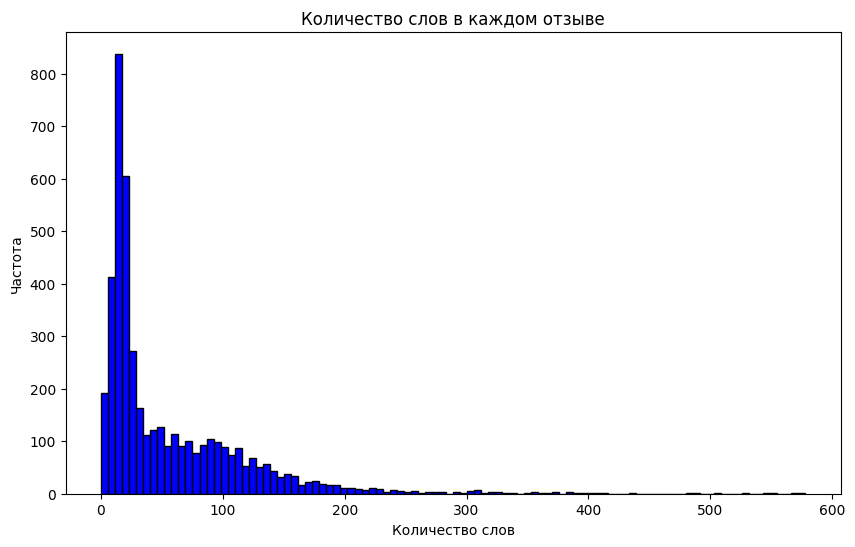

In [158]:
df['word_count'] = df['posts'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
plt.hist(df['word_count'], bins=100, color='blue', edgecolor='black')
plt.title('Количество слов в каждом отзыве')
plt.xlabel('Количество слов')
plt.ylabel('Частота')

In [159]:
df[df['word_count'] > 375]

posts  word_count
317   в нашей еженедельной рубрике ауреки рассказыва...         395
373   собрали подборку куда можно съездить летом и п...         485
379   вы начинающий диспетчер по движению судов на в...         382
599   опорафлота часть 2 рахматов эдуард николаевич ...         385
600   опорафлота часть 1 рахматов эдуард николаевич ...         503
1786   продолжая тему поднятую в дружественных канал...         382
2016  дунайский порт измаил расширенное подтверждени...         404
2994  пётр великий и речные трамвайчики в питере кот...         409
3028  валентин шашин буровое судно которое использов...         413
3039  как теплоход столкнулся с поездом засекреченна...         571
3312  7 малый охотник 174 бывший пограничный катер п...         578
3313  корабли краснознаменной ладожской военной флот...         547
3325  удаление мазута с затонувших танкеров два подх...         530
3397  материал о пожарном судне ко дню пожарной охра...         553
3550  самое большое научноисследовательское судно в ...         388
3708   14 марта 1987 года одна из скорбных дат в ист...         483
3931  50 лет со дня трагедии на зрс березина аш2012 ...         487
3992   тихрыбком выиграл спор с таможней о размере п...         392
4341  14 ноября 1920 г севастопольскую бухту покинул...         394
4471  у черного моря в исторических летописях есть 2...         434

In [160]:
# Уберем строки, где 'word_count' больше 375
texts_was = df.shape[0]
print(f"Было строк до фильтрации : {texts_was}")
df = df[df['word_count'] <= 375]

texts_now = df.shape[0]
print(f"Оставлено строк после фильтрации : {texts_now}")
print(f"Удалено {texts_was - texts_now} строк")
df

Было строк до фильтрации : 4507
Оставлено строк после фильтрации : 4487
Удалено 20 строк


posts  word_count
0     в декабре на вкмск приступает к работе новое с...          66
1     вы знали где находится первая и единственная п...         230
2     сегодня страна отмечает день матери день благо...         105
3     сегодня в рамках совместного с музеем морского...          61
4                           рекаморе видео ян сильченко           4
...                                                 ...         ...
4502  буксир рита тип полярник выходил из реки дубны...          25
4503  буксиртолкач шлюзовой240 с баржей вд1256п выхо...          31
4504  красноармейский рейд ранним утром 26 октября 2...          50
4505                               закат над химкинским           3
4506  буксиртолкач ота929 с приставкой сфс333 на рек...          13

[4487 rows x 2 columns]

## Лематизация

In [161]:
# создаём морфологический анализатор
morph = pymorphy3.MorphAnalyzer()

if 'russian_stopwords' not in locals():
      russian_stopwords = stopwords.words("russian")
      russian_stopwords.append('судно')

texts_as_lists = []

def preprocess_text(text):
    if isinstance(text, str):
        text = re.sub(r'[^а-яё]', ' ', text) # Удаление пунктуации, кроме пробелов
        # разбиваем на слова
        words = text.split()
        # приводим к леммам, убираем стоп-слова и короткие слова
        lemmas = [morph.parse(word)[0].normal_form for word in words if word not in russian_stopwords and len(word) > 2]
        texts_as_lists.append(lemmas)
        return " ".join([lemma for lemma in lemmas if lemma not in russian_stopwords])
    return "" # Возвращаем пустую строку для нестроковых значений

print("\nНачало предобработки текста...")
# Применение предобработки к столбцу с текстом. Используем tqdm для отслеживания прогресса.
if 'posts' in df.columns:
    tqdm.pandas()
    df['posts'] = df['posts'].progress_apply(preprocess_text)
    print("Предобработка текста завершена.")
    display(df)


Начало предобработки текста...


100%|██████████| 4487/4487 [00:22<00:00, 196.09it/s]

Предобработка текста завершена.


posts  word_count
0     декабрь вкмск приступать работа новый обеспече...          66
1     знать находиться первый единственный приливный...         230
2     сегодня страна отмечать день мать день благода...         105
3     сегодня рамка совместный музей морской речной ...          61
4                              рекамора видео сильченко           4
...                                                 ...         ...
4502  буксир рита тип полярник выходить река дубна в...          25
4503  буксиртолкач шлюзовый баржа выход река дубна в...          31
4504  красноармейский рейд ранний утром октябрь год ...          50
4505                                   закат химкинский           3
4506  буксиртолкач ота приставка сфс река волга сама...          13

[4487 rows x 2 columns]

## Визуализация исходных данных

In [162]:
# import plotly.express as px

# # Интерактивное облако слов
# from wordcloud import WordCloud

# def plot_interactive_topics(lda_model, feature_names, n_top_words=10):
#     topics = {}
#     for topic_idx, topic in enumerate(lda_model.components_):
#         topics[f"Topic {topic_idx}"] = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
    
#     return pd.DataFrame(topics)

d:\Уник\АВИШ\5 семестр\Анализ больших текстовых данных и текстовый поиск\Курсовая работа\.env\Lib\site-packages\matplotlib\cbook.py:684: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  x = np.array(x, subok=True, copy=copy)


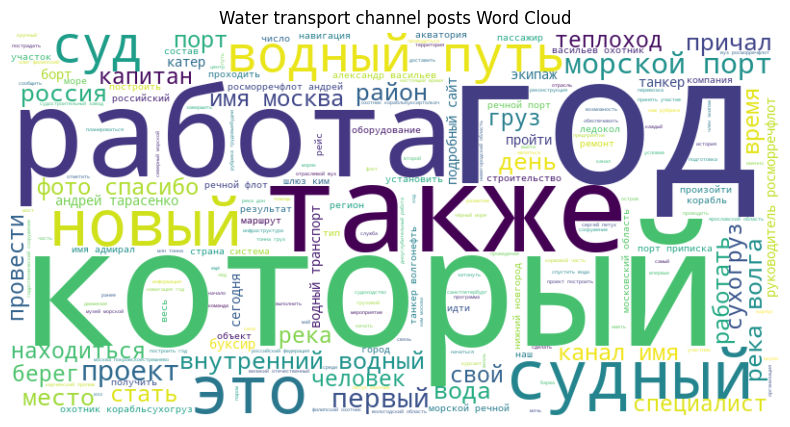

In [163]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(''.join(list(df['posts'])))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.title("Water transport channel posts Word Cloud")
plt.show()

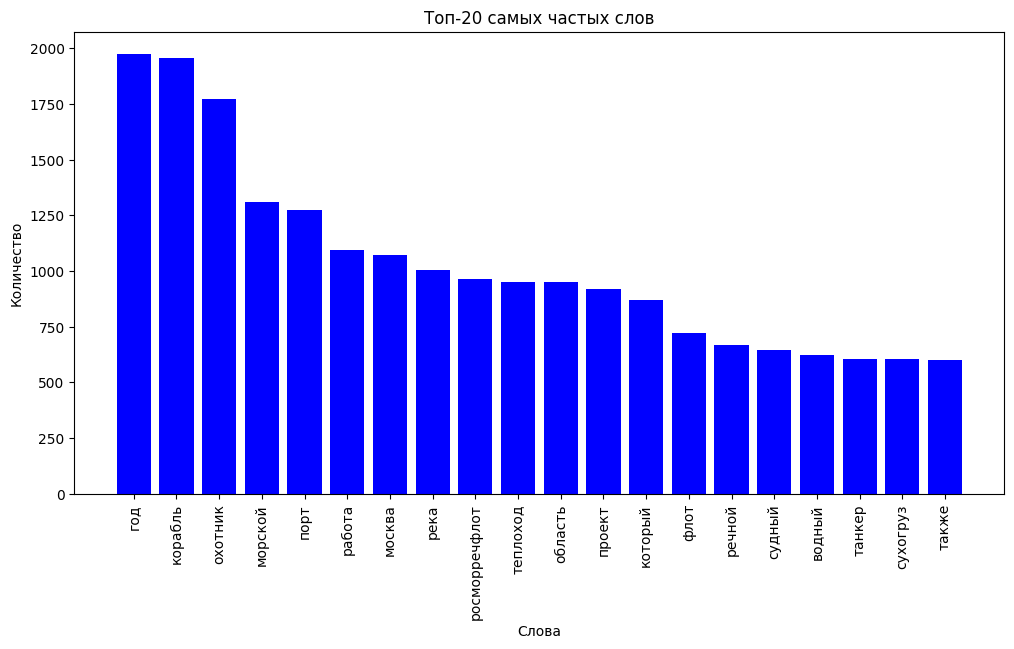

In [164]:
from collections import Counter
all_words = " ".join(df['posts']).split()
word_freq = Counter(all_words)
top_20 = word_freq.most_common(20)
words, counts = zip(*top_20)

plt.figure(figsize=(12,6))
plt.bar(words, counts, color='blue')
plt.xticks(rotation=90)
plt.title("Топ-20 самых частых слов")
plt.ylabel("Количество")
plt.xlabel("Слова")
plt.show()

# Векторизация

In [165]:
# Векторизация текста
count_vectorizer = CountVectorizer(max_features=1000, ngram_range=(1, 2), stop_words=russian_stopwords, max_df=0.8, min_df=2)
dataset = count_vectorizer.fit_transform(df['posts'])

# LDA (5 тем)

## Модель

In [166]:
lda = LDA(n_components = 5,
         max_iter=10,
         n_jobs=-1,
         learning_method='batch',
         random_state=42)
lda.fit(dataset)

LatentDirichletAllocation(n_components=5, n_jobs=-1, random_state=42)

## Итог

In [167]:
# Функция для визуализации 'no_top_words' самых значимых слов в каждой теме
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Тема {topic_idx + 1}:", ", ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [168]:
tf_feature_names = count_vectorizer.get_feature_names_out()
display_topics(lda, tf_feature_names, 15)

Тема 1: работа, танкер, волгонефть, специалист, мазут, часть, морспасслужба, море, нефтепродукт, судный, ликвидация, танкер волгонефть, акватория, который, филиал
Тема 2: морской, росморречфлот, год, россия, флот, транспорт, речной, который, день, вуз, руководитель, андрей, имя, страна, адмирал
Тема 3: корабль, охотник, охотник корабль, москва, теплоход, область, река, сухогруз, волга, спасибо, шлюз, буксиртолкач, фото, порт, канал
Тема 4: год, судный, вода, который, порт, экипаж, время, море, борт, капитан, это, место, человек, находиться, произойти
Тема 5: год, проект, порт, морской, путь, водный, росморречфлот, работа, бассейн, водный путь, груз, навигация, внутренний, морской порт, внутренний водный


## Темы

Тема 1: Водные проекты России 

Тема 2: Корабли и учёба 

Тема 3: География водоёмов 

Тема 4: Морская история 

Тема 5: Нефть и аварии 

In [169]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda.score(dataset))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda.perplexity(dataset))

# See model parameters
print(lda.get_params())

Log Likelihood:  -757360.9470951217
Perplexity:  425.3375617940195
{'batch_size': 128, 'doc_topic_prior': None, 'evaluate_every': -1, 'learning_decay': 0.7, 'learning_method': 'batch', 'learning_offset': 10.0, 'max_doc_update_iter': 100, 'max_iter': 10, 'mean_change_tol': 0.001, 'n_components': 5, 'n_jobs': -1, 'perp_tol': 0.1, 'random_state': 42, 'topic_word_prior': None, 'total_samples': 1000000.0, 'verbose': 0}


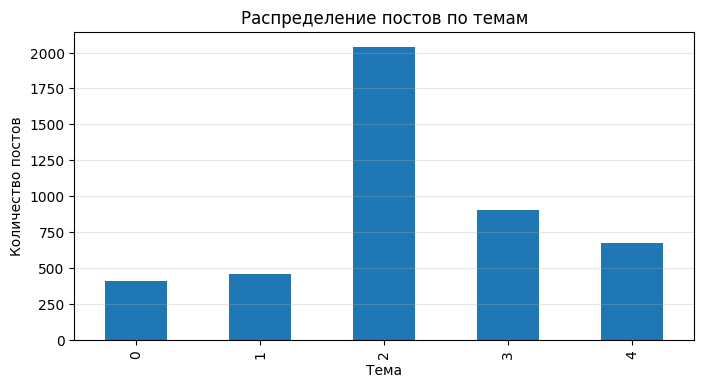

In [170]:
doc_topic_dist = lda.transform(dataset)
dominant_topic = np.argmax(doc_topic_dist, axis=1)
topic_counts = pd.Series(dominant_topic).value_counts().sort_index()

plt.figure(figsize=(8, 4))
topic_counts.plot(kind="bar")
plt.title("Распределение постов по темам")
plt.xlabel("Тема")
plt.ylabel("Количество постов")
plt.grid(axis="y", alpha=0.3)
plt.show()

# LDA (10 тем)

## Модель

In [171]:
lda2 = LDA(n_components = 10,
         max_iter=10,
         n_jobs=-1,
         learning_method='batch',
         random_state=42)
lda2.fit(dataset)

LatentDirichletAllocation(n_jobs=-1, random_state=42)

## Итог

In [172]:
tf_feature_names = count_vectorizer.get_feature_names_out()
display_topics(lda2, tf_feature_names, 15)

Тема 1: танкер, работа, волгонефть, мазут, морспасслужба, нефтепродукт, часть, судный, акватория, ликвидация, танкер волгонефть, пролив, специалист, затонуть, керченский
Тема 2: росморречфлот, морской, транспорт, россия, развитие, год, руководитель, андрей, также, вуз, водный, руководитель росморречфлот, тарасенко, андрей тарасенко, вопрос
Тема 3: корабль, охотник, охотник корабль, область, река, волга, спасибо, теплоход, фото, река волга, фото спасибо, сухогруз, буксиртолкач, сергей, баржа
Тема 4: год, это, день, который, первый, время, вода, место, работа, стать, свой, новый, капитан, самый, город
Тема 5: проект, порт, морской, год, завод, построить, строительство, новый, флот, судный, ледокол, морской порт, росморречфлот, работа, суд
Тема 6: москва, корабль, охотник, охотник корабль, канал, теплоход, шлюз, имя, канал имя, имя москва, год, ким, тип, шлюз ким, порт
Тема 7: морской, флот, порт, год, победа, наш, великий, морской порт, речной, сегодня, море, музей, война, речной флот, м

In [173]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda2.score(dataset))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda2.perplexity(dataset))

# See model parameters
print(lda2.get_params())

Log Likelihood:  -744933.5206476871
Perplexity:  385.1227949850902
{'batch_size': 128, 'doc_topic_prior': None, 'evaluate_every': -1, 'learning_decay': 0.7, 'learning_method': 'batch', 'learning_offset': 10.0, 'max_doc_update_iter': 100, 'max_iter': 10, 'mean_change_tol': 0.001, 'n_components': 10, 'n_jobs': -1, 'perp_tol': 0.1, 'random_state': 42, 'topic_word_prior': None, 'total_samples': 1000000.0, 'verbose': 0}


## Визуализация

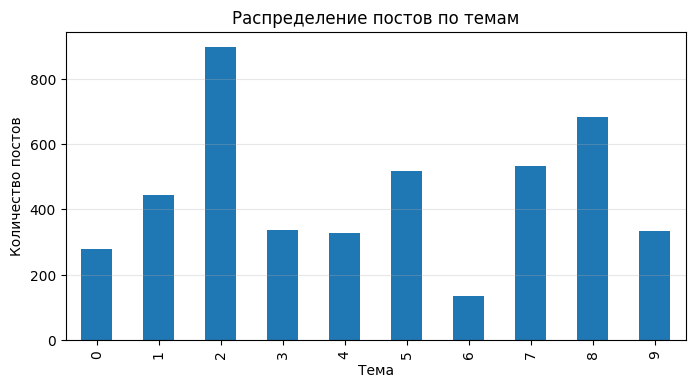

In [174]:
doc_topic_dist = lda2.transform(dataset)
dominant_topic = np.argmax(doc_topic_dist, axis=1)
topic_counts = pd.Series(dominant_topic).value_counts().sort_index()

plt.figure(figsize=(8, 4))
topic_counts.plot(kind="bar")
plt.title("Распределение постов по темам")
plt.xlabel("Тема")
plt.ylabel("Количество постов")
plt.grid(axis="y", alpha=0.3)
plt.show()

# LDA с GridSearchCV

## Модель

In [175]:
from sklearn.model_selection import GridSearchCV

# Define Search Param
search_params = {'n_components': [10, 15, 20, 25, 30], 'learning_decay': [.5, .7, .9]}

# Init the Model
lda = LDA()

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)

# Do the Grid Search
model.fit(dataset)
GridSearchCV(cv=None, error_score='raise',
       estimator=LDA(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_offset=10.0, max_doc_update_iter=100, max_iter=10,
             mean_change_tol=0.001, n_components=10, n_jobs=1,
             perp_tol=0.1, random_state=None,
             topic_word_prior=None, total_samples=1000000.0, verbose=0),
       n_jobs=1,
       param_grid={'n_topics': [10, 15, 20, 25, 30], 'learning_decay': [0.5, 0.7, 0.9]},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=None, verbose=0)

GridSearchCV(error_score='raise', estimator=LatentDirichletAllocation(n_jobs=1),
             n_jobs=1,
             param_grid={'learning_decay': [0.5, 0.7, 0.9],
                         'n_topics': [10, 15, 20, 25, 30]})

## Результаты

In [176]:
# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(dataset))

Best Model's Params:  {'learning_decay': 0.7, 'n_components': 10}
Best Log Likelihood Score:  -165534.10649893727
Model Perplexity:  393.8256309949202


In [177]:
# Create Document - Topic Matrix
lda_output = best_lda_model.transform(dataset)

# column names
topicnames = ["Topic" + str(i) for i in range(best_lda_model.n_components)] # type: ignore

# index names
docnames = ["Doc" + str(i) for i in range(len(df['posts']))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold) # type: ignore
df_document_topics

In [178]:
df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution

Topic Num  Num Documents
0          7            675
1          9            645
2          0            625
3          2            550
4          3            530
5          6            389
6          5            356
7          8            288
8          4            274
9          1            155

In [179]:
# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(best_lda_model.components_)

# Assign Column and Index
df_topic_keywords.columns = count_vectorizer.get_feature_names_out()
df_topic_keywords.index = topicnames

# View
df_topic_keywords.head()

аварийноспасательный  аварийный     авария     август  автомобильный  \
Topic0              0.100005   0.100005   0.100003   0.100698       0.100028   
Topic1              0.100008   0.100004   0.100001   0.100027       0.100025   
Topic2              6.254029   0.100008   0.100009  10.936259      40.718968   
Topic3              0.100000   0.100005   0.100010   0.100021       0.100001   
Topic4             80.922954  62.153636  48.275871   0.110345       0.100004   

        автономный  агентство        адм  администрация     адмирал  ...  \
Topic0    0.100001   0.100000   0.100001       0.100002    0.100016  ...   
Topic1    0.100003   0.100013   0.100013       0.100015    0.100028  ...   
Topic2   25.219787  31.076407  50.099963      10.739228  179.849959  ...   
Topic3    0.100005   0.100001   0.100000       0.100003    0.100009  ...   
Topic4    7.547295   1.414622   0.100012       7.194420    0.100014  ...   

               это  эффективный     южный   являться     якорь     якутия  \
Topic0    0.100004     0.100003  0.100009   0.100003  1.203085   0.100005   
Topic1    2.880658     0.100002  2.239807   0.387270  0.100000   0.100036   
Topic2  112.403538    57.118597  5.219347  64.153125  0.100000  35.219327   
Topic3    0.100007     0.100009  0.100006   0.100013  0.100016   0.100023   
Topic4   36.281608     4.155063  0.101633  10.064193  0.100012   0.100008   

           январь  ярославский  ярославский область      яхта  
Topic0   0.100004     0.190516             0.100008  5.611340  
Topic1   6.191489     0.100000             0.100000  0.136136  
Topic2   0.100019     0.100002             0.100002  0.100015  
Topic3   1.179192   102.009450            88.099976  0.121623  
Topic4  45.287777     0.100002             0.100000  0.100003  

[5 rows x 1000 columns]

In [180]:
# Show top n keywords for each topic
def show_topics(vectorizer=count_vectorizer, lda_model=lda, n_words=20):
    keywords = np.array(vectorizer.get_feature_names_out())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=count_vectorizer, lda_model=best_lda_model, n_words=15)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

Word 0   Word 1           Word 2           Word 3  \
Topic 0        корабль  охотник  охотник корабль          спасибо   
Topic 1           флот  морской              год            канал   
Topic 2  росморречфлот  морской              год        транспорт   
Topic 3          волга  область          корабль          охотник   
Topic 4         работа   танкер          морской             порт   
Topic 5         москва  корабль          охотник  охотник корабль   
Topic 6         работа  бассейн              год             путь   
Topic 7        корабль  охотник  охотник корабль           москва   
Topic 8            год   проект            завод           первый   
Topic 9            год   экипаж           судный          который   

                  Word 4    Word 5        Word 6        Word 7         Word 8  \
Topic 0             фото  теплоход  фото спасибо          река        область   
Topic 1           победа       наш           имя       великий        сегодня   
Topic 2         развитие      порт        россия        водный          также   
Topic 3  охотник корабль      река    река волга        сергей       теплоход   
Topic 4       волгонефть     мазут        судный  морской порт  морспасслужба   
Topic 5              год      порт      теплоход           тип         проект   
Topic 6    администрация    водный     навигация   водный путь           шлюз   
Topic 7        александр       ким          шлюз     москверек   буксиртолкач   
Topic 8            новый      рейс      теплоход  пассажирский           вода   
Topic 9             борт      вода          море         время      произойти   

               Word 9         Word 10             Word 11            Word 12  \
Topic 0      сухогруз  санктпетербург              причал       пассажирский   
Topic 1       ледокол          москва               музей             речной   
Topic 2  транспортный    руководитель  сайт росморречфлот               сайт   
Topic 3  буксиртолкач           баржа                шлюз           сухогруз   
Topic 4     акватория           часть        нефтепродукт         ликвидация   
Topic 5      сухогруз       построить              окский           приписка   
Topic 6         канал      внутренний                река  внутренний водный   
Topic 7      шлюз ким           затон            васильев   васильев охотник   
Topic 8        речной       построить            пассажир                суд   
Topic 9          порт         человек          находиться              берег   

                       Word 13        Word 14  
Topic 0  пассажирский теплоход           нева  
Topic 1                  война    речной флот  
Topic 2                 проект        который  
Topic 3            ярославский  нижегородский  
Topic 4                   море        который  
Topic 5                   мост  порт приписка  
Topic 6             сооружение           флот  
Topic 7     александр васильев            дон  
Topic 8                который        маршрут  
Topic 9                капитан          катер

In [181]:
def plot_interactive_topics(lda_model, feature_names, n_top_words=10):
    topics = {}
    for topic_idx, topic in enumerate(lda_model.components_):
        topics[f"Topic {topic_idx}"] = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
    
    return pd.DataFrame(topics)

In [182]:
plot_interactive_topics(best_lda_model, tf_feature_names)

Topic 0  Topic 1        Topic 2          Topic 3        Topic 4  \
0          корабль     флот  росморречфлот            волга         работа   
1          охотник  морской        морской          область         танкер   
2  охотник корабль      год            год          корабль        морской   
3          спасибо    канал      транспорт          охотник           порт   
4             фото   победа       развитие  охотник корабль     волгонефть   
5         теплоход      наш           порт             река          мазут   
6     фото спасибо      имя         россия       река волга         судный   
7             река  великий         водный           сергей   морской порт   
8          область  сегодня          также         теплоход  морспасслужба   
9         сухогруз  ледокол   транспортный     буксиртолкач      акватория   

           Topic 5        Topic 6          Topic 7       Topic 8    Topic 9  
0           москва         работа          корабль           год        год  
1          корабль        бассейн          охотник        проект     экипаж  
2          охотник            год  охотник корабль         завод     судный  
3  охотник корабль           путь           москва        первый    который  
4              год  администрация        александр         новый       борт  
5             порт         водный              ким          рейс       вода  
6         теплоход      навигация             шлюз      теплоход       море  
7              тип    водный путь        москверек  пассажирский      время  
8           проект           шлюз     буксиртолкач          вода  произойти  
9         сухогруз          канал         шлюз ким        речной       порт

## Облака слов

d:\Уник\АВИШ\5 семестр\Анализ больших текстовых данных и текстовый поиск\Курсовая работа\.env\Lib\site-packages\matplotlib\cbook.py:684: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  x = np.array(x, subok=True, copy=copy)
d:\Уник\АВИШ\5 семестр\Анализ больших текстовых данных и текстовый поиск\Курсовая работа\.env\Lib\site-packages\matplotlib\cbook.py:684: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  x = np.array(x, subok=True, copy=copy)
d:\Уник\АВИШ\5 семестр\Анализ боль

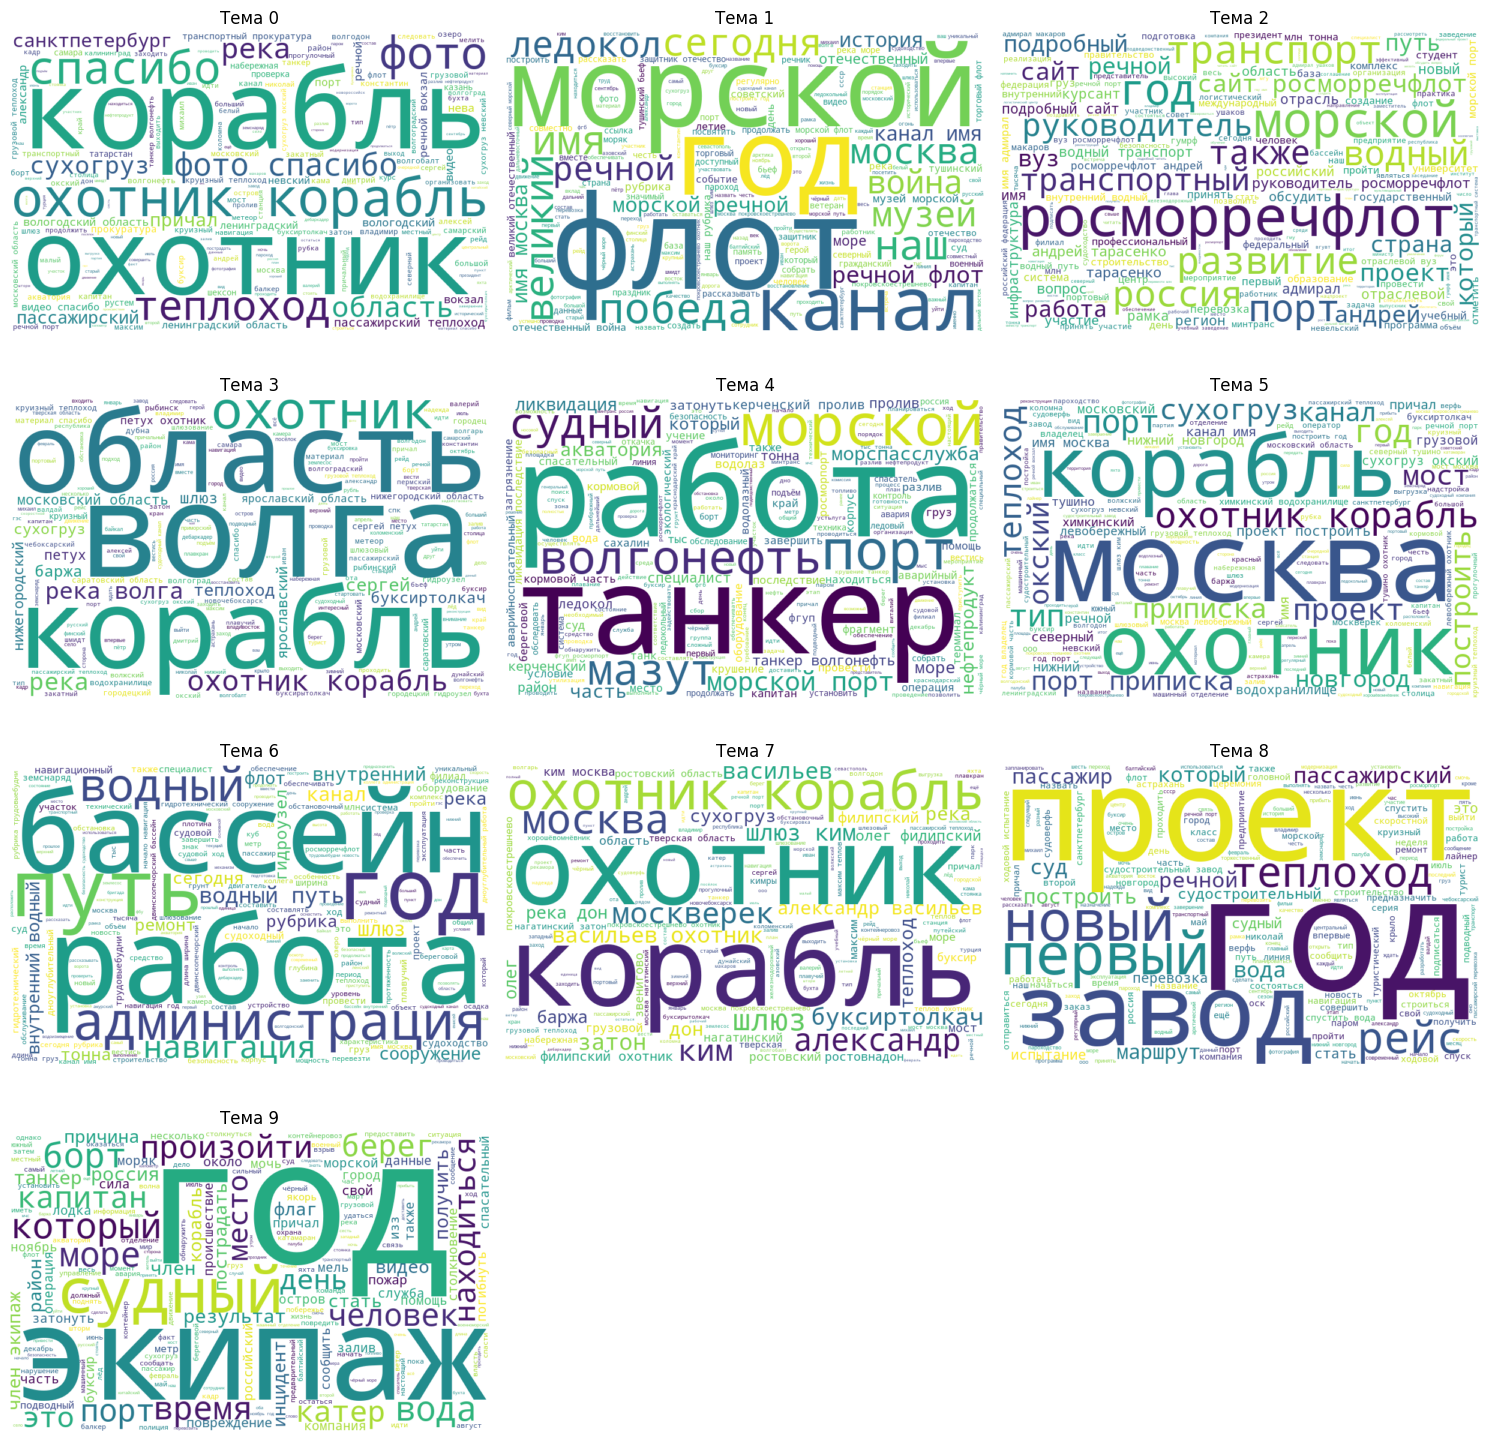

In [183]:
feature_names = count_vectorizer.get_feature_names_out()

n_topics = best_lda_model.components_.shape[0]

plt.figure(figsize=(15, 15))

for topic_idx, topic in enumerate(best_lda_model.components_):
    word_scores = {feature_names[i]: topic[i] for i in range(len(topic))}
    wordcloud = WordCloud(width=800, height=500, background_color="white", colormap="viridis").generate_from_frequencies(word_scores)

    plt.subplot(int(np.ceil(n_topics / 3)), 3, topic_idx + 1)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Тема {topic_idx}")

plt.tight_layout()
plt.show()

# Gensim (LDA)

In [184]:
# Предобработка текста для тематического моделирования в gensim
# Для тематического моделирования часто полезно удалить очень редкие и очень частые слова

# Создание словаря
gensim_dictionary = Dictionary(texts_as_lists)

# Фильтрация слов: удаление очень редких (меньше 5 документов) и очень частых (встречаются более чем в 50% документов)
gensim_dictionary.filter_extremes(no_below=5, no_above=0.5)

# Создание корпуса (мешок слов)
corpus = [gensim_dictionary.doc2bow(text, allow_update=True) for text in texts_as_lists]

print(f"Создан словарь с {len(gensim_dictionary)} уникальными токенами.")
print(f"Создан корпус из {len(corpus)} документов.")

Создан словарь с 15610 уникальными токенами.
Создан корпус из 4487 документов.


## Модель

In [185]:
# Применение алгоритма LDA
# Выбираем количество тем.
num_topics = 10

print(f"\nОбучение модели LDA с {num_topics} темами...")
# Обучение LDA модели
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=gensim_dictionary, passes=15) # Увеличиваем passes для лучшей сходимости

print("Обучение LDA модели завершено.")


Обучение модели LDA с 10 темами...
Обучение LDA модели завершено.


## Результаты

In [186]:
# Интерпретация тем
print("\nВыявленные темы:")
topics = lda_model.print_topics(num_words=10) # Выводим 10 наиболее значимых слов для каждой темы

for topic_id, topic_words in topics:
    print(f"Тема #{topic_id + 1}: {topic_words}")


Выявленные темы:
Тема #1: 0.011*"валерий" + 0.010*"шмидт" + 0.007*"морской" + 0.007*"катар" + 0.007*"вмф" + 0.007*"адмиралтейский" + 0.006*"босфор" + 0.006*"памятник" + 0.006*"раслаффан" + 0.005*"апостол"
Тема #2: 0.022*"морской" + 0.014*"росморречфлот" + 0.012*"порт" + 0.011*"год" + 0.010*"проект" + 0.010*"судно" + 0.007*"работа" + 0.006*"также" + 0.006*"развитие" + 0.006*"который"
Тема #3: 0.013*"катамаран" + 0.011*"саратовский" + 0.010*"уголовный" + 0.010*"лёд" + 0.008*"катер" + 0.008*"тольятти" + 0.007*"ледяной" + 0.007*"испытание" + 0.007*"шикарный" + 0.007*"нева"
Тема #4: 0.016*"победа" + 0.012*"великий" + 0.010*"море" + 0.009*"флот" + 0.009*"видео" + 0.008*"война" + 0.008*"анастасия" + 0.008*"морской" + 0.007*"сегодня" + 0.007*"музей"
Тема #5: 0.017*"год" + 0.014*"день" + 0.011*"который" + 0.011*"это" + 0.008*"флот" + 0.007*"время" + 0.007*"новый" + 0.006*"свой" + 0.006*"весь" + 0.006*"наш"
Тема #6: 0.081*"корабль" + 0.079*"охотник" + 0.035*"москва" + 0.028*"область" + 0.025*"т

## Визуализация

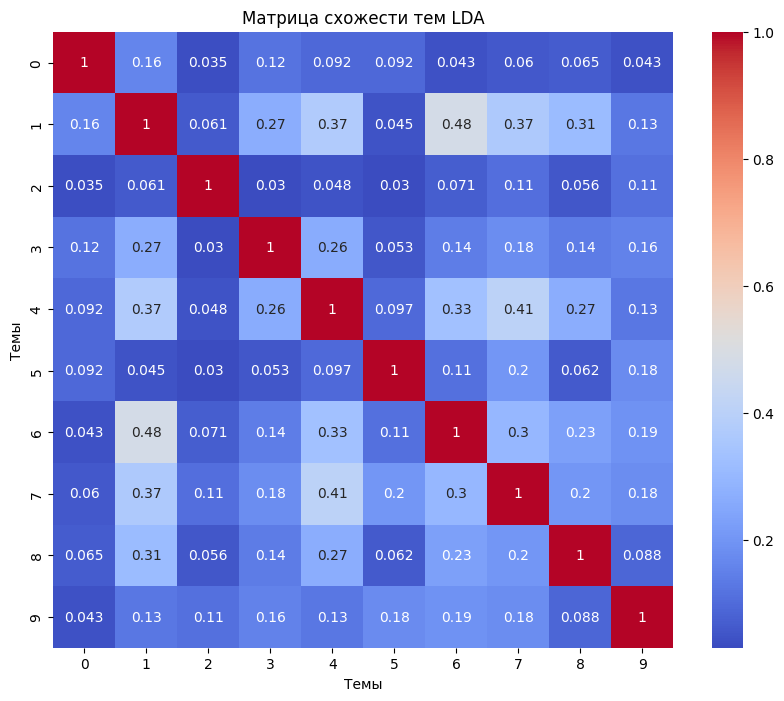

In [187]:
texts = [text.split() for text in df['posts']]
dictionary = Dictionary(texts)
dictionary.filter_extremes(no_below=5, no_above=0.5)

num_topics = lda_model.num_topics
topic_word_dist = []

for i in range(num_topics):
    topic_terms = lda_model.get_topic_terms(i, topn=len(gensim_dictionary))
    vector = np.zeros(len(gensim_dictionary))
    for word_id, weight in topic_terms:
        vector[word_id] = weight
    topic_word_dist.append(vector)

topic_word_dist = np.array(topic_word_dist)

# Косинусная схожесть между темами
similarity_matrix = cosine_similarity(topic_word_dist)

plt.figure(figsize=(10,8))
sns.heatmap(similarity_matrix, annot=True, cmap="coolwarm")
plt.title("Матрица схожести тем LDA")
plt.xlabel("Темы")
plt.ylabel("Темы")
plt.show()

<function matplotlib.pyplot.xlabel(xlabel: 'str', fontdict: 'dict[str, Any] | None' = None, labelpad: 'float | None' = None, *, loc: "Literal['left', 'center', 'right'] | None" = None, **kwargs) -> 'Text'>

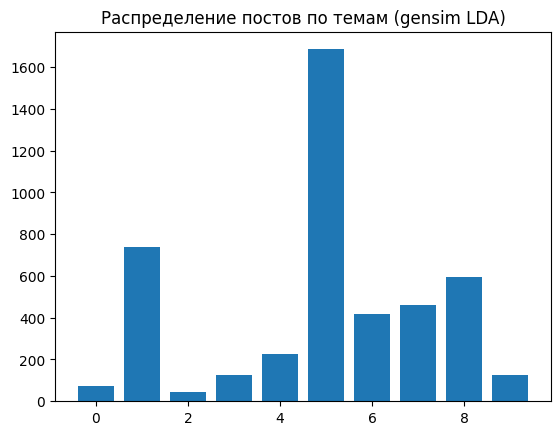

In [188]:
doc_topics = []

for bow in corpus:
    topic_dist = lda_model.get_document_topics(bow)
    dominant_topic = max(topic_dist, key=lambda x: x[1])[0]
    doc_topics.append(dominant_topic)

counts = Counter(doc_topics)
plt.bar(counts.keys(), counts.values()) # type: ignore
plt.title("Распределение постов по темам (gensim LDA)")
plt.xlabel

# BERTopic

## Модель

In [189]:
from bertopic import BERTopic

documents = list(df['posts'])

topic_model = BERTopic(
    language="russian",
    n_gram_range=(1, 2),
    calculate_probabilities=True
)

topics, probs = topic_model.fit_transform(documents)

## Темы

In [190]:
topic_info = topic_model.get_topic_info()
num_topics = len(topic_info)
print(f"Всего найдено тем: {num_topics}")

for topic_num in topic_info.Topic:
    words = topic_model.get_topic(topic_num)
    
    if words:
        top_words = [word[0] for word in words[:10]] # type: ignore
        print(f"Тема #{topic_num}: {', '.join(top_words)}")

Всего найдено тем: 72
Тема #-1: корабль, год, охотник, охотник корабль, морской, росморречфлот, теплоход, порт, работа, москва
Тема #0: олег филипский, филипский, филипский охотник, олег, корабль, охотник корабль, охотник, чёрный море, чёрный, море
Тема #1: развитие, росморречфлот, порт, транспортный, морской, транспорт, регион, инфраструктура, вопрос, груз
Тема #2: ота, шлюз, спать, инженер шуткова, шуткова, теплоход, рейдовый, вечер, мойгород, тотсамыйдемок
Тема #3: московский область, московский, москва, имя москва, канал имя, область, охотник, охотник корабль, корабль, имя
Тема #4: мост, мост москва, охотник, москверек, охотник корабль, корабль, москва, сухогруз, мост ростовнадон, проходить
Тема #5: имя адмирал, адмирал, вуз, курсант, специальность, имя, морской, образование, росморречфлот, отраслевой
Тема #6: приписка, порт приписка, проект построить, построить, тип, проект, год, год владелец, порт, владелец
Тема #7: охотник корабль, охотник, корабль, тушино, северный, москва севе

## Визуализация

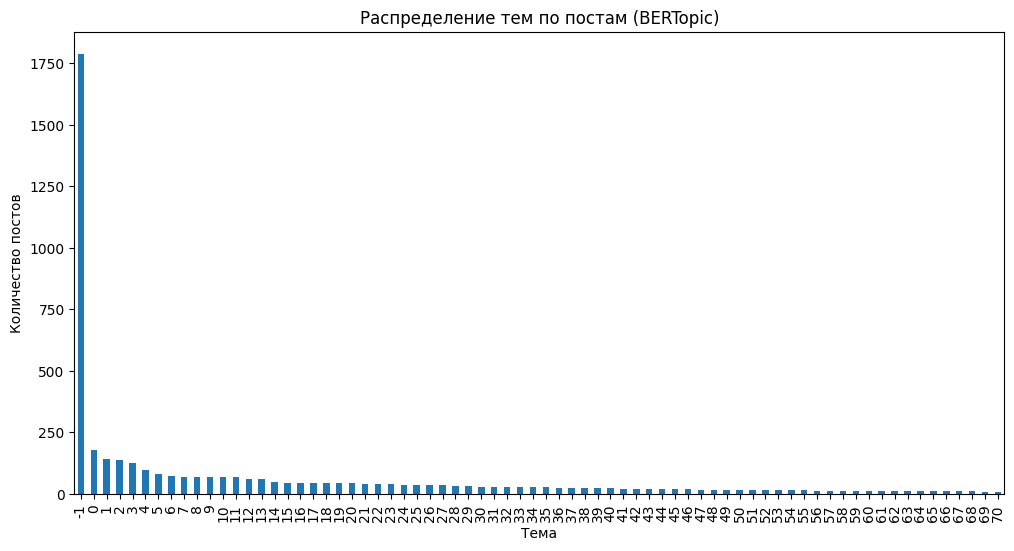

In [191]:
topics = topic_model.topics_

topic_counts = pd.Series(topics).value_counts().sort_index()

plt.figure(figsize=(12, 6))
topic_counts.plot(kind='bar')
plt.xlabel("Тема")
plt.ylabel("Количество постов")
plt.title("Распределение тем по постам (BERTopic)")
plt.show()

# NMF

In [192]:
tfidf_vectorizer = TfidfVectorizer(
    max_features=1000,
    ngram_range=(1, 2),
    stop_words=list(russian_stopwords),
    max_df=0.9,
    min_df=2
)
tfidf = tfidf_vectorizer.fit_transform(df['posts'])

## Модель

In [193]:
# Create a TF-IDF vectorizer and fit_transform
tfidf_vectorizer = TfidfVectorizer(stop_words = list(russian_stopwords), max_df=0.9, min_df=2)
tfidf = tfidf_vectorizer.fit_transform(df['posts'])

# Apply NMF
num_topics = 10  # Set the number of topics you want to identify
nmf_model = NMF(n_components=num_topics, init='random', random_state=42)
nmf_matrix = nmf_model.fit_transform(tfidf)

## Темы

In [194]:
tf_feature_names = tfidf_vectorizer.get_feature_names_out()
display_topics(nmf_model, tf_feature_names, 15)

Тема 1: танкер, волгонефть, судный, мазут, работа, часть, морспасслужба, борт, вода, экипаж, нефтепродукт, район, который, находиться, затонуть
Тема 2: волга, область, река, охотник, корабль, ярославский, тверская, кимры, буксиртолкач, максим, теплов, сухогруз, баржа, саратовский, петух
Тема 3: москва, москверек, васильев, александр, охотник, корабль, буксиртолкач, баржа, мост, хорошёвомнёвник, набережная, нагатинский, теплоход, дорогомилово, причал
Тема 4: спасибо, фото, охотник, корабль, санктпетербург, теплоход, видео, анастасия, марус, материал, нева, река, закатный, шмидт, казань
Тема 5: звенигово, затон, сергей, марийэла, марфин, буксиртолкач, охотник, корабль, дунайский, баржа, волгарь, буксирытолкач, нагатинский, петух, бутяков
Тема 6: росморречфлот, морской, год, водный, путь, бассейн, развитие, работа, транспорт, навигация, внутренний, порт, проект, также, сайт
Тема 7: порт, сухогруз, тип, теплоход, год, приписка, построить, проект, окский, невский, москва, северный, тушино, 

## Визуализация

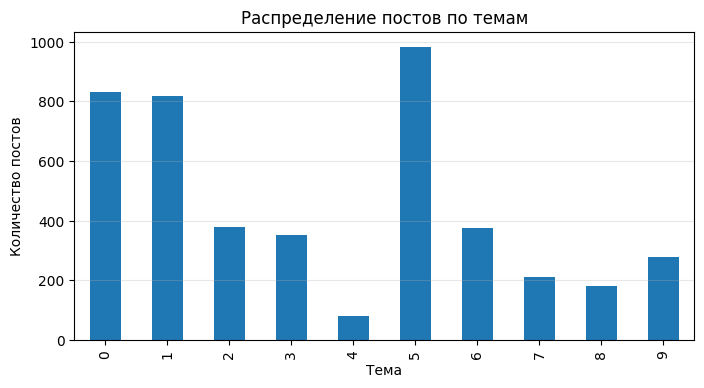

In [195]:
doc_topic_dist = nmf_matrix
dominant_topic = np.argmax(doc_topic_dist, axis=1)
topic_counts = pd.Series(dominant_topic).value_counts().sort_index()

plt.figure(figsize=(8, 4))
topic_counts.plot(kind="bar")
plt.title("Распределение постов по темам")
plt.xlabel("Тема")
plt.ylabel("Количество постов")
plt.grid(axis="y", alpha=0.3)
plt.show()